    time_in_hr diabetes insulin change readmitted   gender  age medication
0           11       no    high    yes         no     Male   39         no
1            9       no    high     no        yes     Male   50        yes
2            8      yes      up    yes         no     Male   38        yes
3            6      yes  steady    yes         no     Male   53        yes
4            9       no    high    yes        yes   Female   28         no
5            8       no      up    yes        yes   Female   37        yes
6            8      yes  steady    yes         no   Female   49         no
7           10      yes    high    yes        yes     Male   52        yes
8            7       no    high    yes         no   Female   31        yes
9            7      yes    high    yes        yes     Male   42         no
10           6       no    high     no        yes     Male   37        yes
11          10       no      up     no        yes     Male   30         no
12           8       no  

[Row(age=28, workclass=' Private', fnlwght=338409, education=' Bachelors', education no=13, maritial status=' Married-civ-spouse', occupation=' Prof-specialty', relationship=' Wife', race=' Black', gender=' Female', capital gain=0, capital loss=0, hours per week=40, native country=' Cuba', salary=' <=50K '),
 Row(age=37, workclass=' Private', fnlwght=284582, education=' Masters', education no=14, maritial status=' Married-civ-spouse', occupation=' Exec-managerial', relationship=' Wife', race=' White', gender=' Female', capital gain=0, capital loss=0, hours per week=40, native country=' United-States', salary=' <=50K '),
 Row(age=49, workclass=' Private', fnlwght=160187, education=' 9th', education no=5, maritial status=' Married-spouse-absent', occupation=' Other-service', relationship=' Not-in-family', race=' Black', gender=' Female', capital gain=0, capital loss=0, hours per week=16, native country=' Jamaica', salary=' <=50K '),
 Row(age=31, workclass=' Private', fnlwght=45781, educa

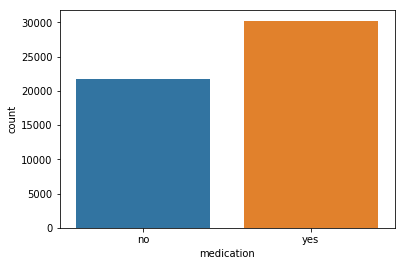

In [6]:
# Section must be included at the beginning of each new notebook. Remember to change the app name. 
# If you're using VirtualBox, change the below to '/home/user/spark-2.1.1-bin-hadoop2.7'
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark


from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('play').getOrCreate()
from pyspark.ml.regression import LinearRegression
# First, let's import the data. Note that we can infer the schema as it's a CSV file.
import pandas as pd
diab = pd.read_csv("Datasets/diabetes_data.csv")
diabspark = spark.read.csv('Datasets/diabetes_data.csv',header=True,inferSchema=True)
df=[diab]
print(diab.head(20))

adult = pd.read_csv("Datasets/adult_data.csv")
adultspark = spark.read.csv('Datasets/adult_data.csv',header=True,inferSchema=True)
af=[adult]
print(adult.head(20))

onlyWomen = diabspark.filter("gender== ' Female'").select('age','insulin','time_in_hr','gender').show()
onlyMen = diabspark.filter("gender== ' Male'").select('age','insulin','time_in_hr','gender').show()
#outit={'col1': onlyWomen,'col2': onlyMen}
#only = pd.DataFrame(data=outit)

#Male=(df[df.sex==" Male"])
onlyWomenA =(adult[adult.gender== " Female"])
print(onlyWomenA.head(20))
onlyWomenA = adultspark.filter("gender== ' Female'")
#.select('age','salary','occupation','maritial status','relationship').show()
#onlyMenA = adult.filter("gender== ' Male'").select('age','salary','occupation','maritial status','relationship').show()
#onlyWomenA = pd.DataFrame(data=onlyWomenA)
#males = df[(df[Gender]=='Male') & (df[Year]==2014)]


import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

#plt.style.use('fivethirtyeight')

#diab.plot(x='age', y="time_in_hr")

#plt.style.use('classic')
import seaborn as sns
sns.countplot(diab['gender'],label="Count")
sns.countplot(diab['medication'],label="Count",)

#sns.regplot(x='gender', y= 'salary', data=adult)
#sns.countplot(adult)
#sns.countplot(onlyMenA)

onlyWomenA.head(10)



filled_df = adultspark.na.fill('UNDISCLOSED', subset=['maritial'])
filled_df.show()
print("total data points",adultspark.count() )


In [12]:
dropped_df = adultspark.na.drop()
dropped_df.show()
print("Total data points:", dropped_df.count())

+---+-----------------+-------+-------------+------------+--------------------+------------------+--------------+-------------------+-------+------------+------------+--------------+--------------+-------+
|age|        workclass|fnlwght|    education|education no|     maritial status|        occupation|  relationship|               race| gender|capital gain|capital loss|hours per week|native country| salary|
+---+-----------------+-------+-------------+------------+--------------------+------------------+--------------+-------------------+-------+------------+------------+--------------+--------------+-------+
| 39|        State-gov|  77516|    Bachelors|          13|       Never-married|      Adm-clerical| Not-in-family|              White|   Male|        2174|           0|            40| United-States| <=50K |
| 50| Self-emp-not-inc|  83311|    Bachelors|          13|  Married-civ-spouse|   Exec-managerial|       Husband|              White|   Male|           0|           0|         

In [16]:
missing_field_df = adultspark.na.drop(subset="maritial status")
missing_field_df.show()
print("Total data points:", missing_field_df.count())

+---+-----------------+-------+-------------+------------+--------------------+------------------+--------------+-------------------+-------+------------+------------+--------------+--------------+-------+
|age|        workclass|fnlwght|    education|education no|     maritial status|        occupation|  relationship|               race| gender|capital gain|capital loss|hours per week|native country| salary|
+---+-----------------+-------+-------------+------------+--------------------+------------------+--------------+-------------------+-------+------------+------------+--------------+--------------+-------+
| 39|        State-gov|  77516|    Bachelors|          13|       Never-married|      Adm-clerical| Not-in-family|              White|   Male|        2174|           0|            40| United-States| <=50K |
| 50| Self-emp-not-inc|  83311|    Bachelors|          13|  Married-civ-spouse|   Exec-managerial|       Husband|              White|   Male|           0|           0|         

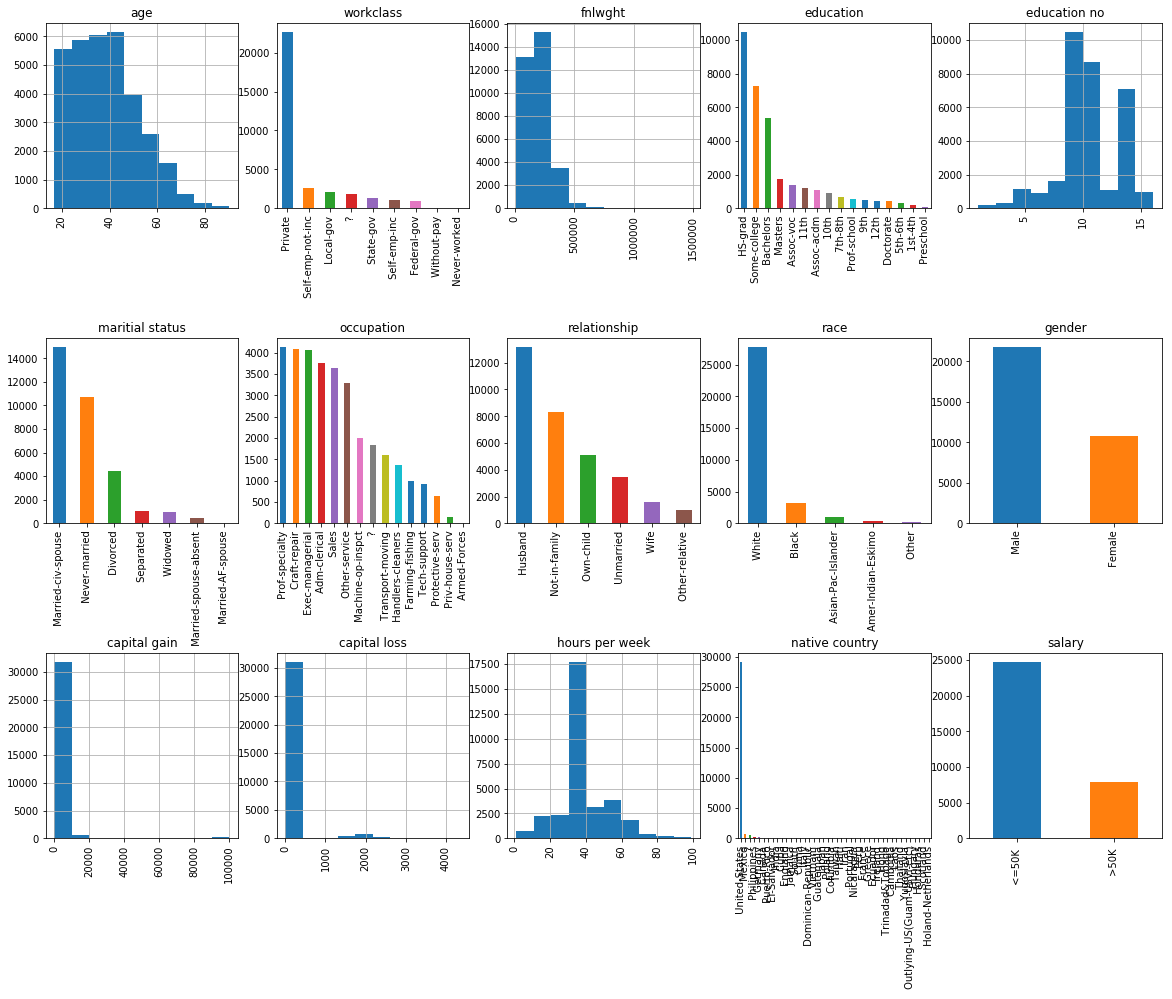

In [20]:
import math as mt
import numpy as np
fig = plt.figure(figsize=(20,15))
cols = 5
rows = mt.ceil(float(adult.shape[1]) / cols)
for i, column in enumerate(adult.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if adult.dtypes[column] == np.object:
        adult[column].value_counts().plot(kind="bar", axes=ax)
    else:
        adult[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [4]:

from pyspark.sql.functions import mean

mean_time = diabspark.select(mean('time_in_hr')).show()

mean_time = diabspark.select(mean('time_in_hr')).collect()
print(mean_time)

mean_time = mean_time[0]
print(mean_time)

mean_time = mean_time[0]
print(mean_time)

#filled_df = filled_df.na.fill(mean_time, subset=['time_in_hr'])
onlyWomen = diabspark.filter("gender== ' Female'").select('age','insulin','time_in_hr','gender').show()
#onlyWomen = filled_df.na.fill(mean_time, subset=['time_in_hr'])



#filled_df.show()

+----------------+
| avg(time_in_hr)|
+----------------+
|8.00641872178373|
+----------------+

[Row(avg(time_in_hr)=8.00641872178373)]
Row(avg(time_in_hr)=8.00641872178373)
8.00641872178373
+---+-------+----------+-------+
|age|insulin|time_in_hr| gender|
+---+-------+----------+-------+
| 28|   high|         9| Female|
| 37|     up|         8| Female|
| 49| steady|         8| Female|
| 31|   high|         7| Female|
| 23|   high|         8| Female|
| 43|     up|        10| Female|
| 54|     up|         7| Female|
| 59|   high|         9| Female|
| 19|   high|         9| Female|
| 49|     up|         8| Female|
| 44|   high|        10| Female|
| 25|   high|         6| Female|
| 18| steady|         7| Female|
| 47|   high|         9| Female|
| 28|   high|         8| Female|
| 53|   high|         9| Female|
| 31|     up|        10| Female|
| 18|   high|         6| Female|
| 46|     up|         6| Female|
| 44| steady|        10| Female|
+---+-------+----------+-------+
only showing top 

In [7]:
onlyWomen = diabspark.filter("gender== ' Female'").select('age','insulin','time_in_hr','gender').show()
onlyWomenA =(adult[adult.gender== " Female"])
onlyWomenA.head(10)

+---+-------+----------+-------+
|age|insulin|time_in_hr| gender|
+---+-------+----------+-------+
| 28|   high|         9| Female|
| 37|     up|         8| Female|
| 49| steady|         8| Female|
| 31|   high|         7| Female|
| 23|   high|         8| Female|
| 43|     up|        10| Female|
| 54|     up|         7| Female|
| 59|   high|         9| Female|
| 19|   high|         9| Female|
| 49|     up|         8| Female|
| 44|   high|        10| Female|
| 25|   high|         6| Female|
| 18| steady|         7| Female|
| 47|   high|         9| Female|
| 28|   high|         8| Female|
| 53|   high|         9| Female|
| 31|     up|        10| Female|
| 18|   high|         6| Female|
| 46|     up|         6| Female|
| 44| steady|        10| Female|
+---+-------+----------+-------+
only showing top 20 rows



,age,workclass,fnlwght,education,education no,maritial status,occupation,relationship,race,gender,capital gain,capital loss,hours per week,native country,salary
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
12,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
21,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
24,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
37,19,Private,544091,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K
43,49,Private,94638,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [12]:
import pandas as pd
diab = pd.read_csv("Datasets/diabetes_data.csv")
adult = pd.read_csv("Datasets/adult_data.csv")
filenames = ['Datasets/diabetes_data.csv','Datasets/adult_data.csv']
dataframes = [pd.read_csv(f) for f in filenames]

onlyWomen =(diab[diab.gender== " Female"])
onlyWomenA =(adult[adult.gender== " Female"])
print(onlyWomen)
result = pd.merge(onlyWomen, onlyWomenA, left_on='age', right_index=True,how='inner', sort=True)
#print(result)
#result= result.select('time_in_hr','diabetes','insulin','change','gender_x','age_x','medication','readmitted','occupation','maritial status','relationship','hours per week','salary')
result.drop(['capital gain','capital loss','gender_y','age_y','native country','fnlwght'],axis=1,inplace=True)

print(result)

       time_in_hr diabetes insulin change readmitted   gender  age medication
4             9.0       no    high    yes        yes   Female   28         no
5            10.0       no      up    yes        yes   Female   37        yes
6             6.0      yes  steady    yes         no   Female   49         no
8             7.0       no    high    yes         no   Female   31        yes
12            8.0       no    high    yes         no   Female   23         no
19            9.0      yes      up    yes         no   Female   43        yes
21            9.0       no      up     no        yes   Female   54         no
24            9.0      yes    high     no        yes   Female   59        yes
37           10.0      yes    high     no        yes   Female   19         no
43            9.0       no      up    yes        yes   Female   49        yes
47            8.0      yes    high    yes        yes   Female   44         no
50            8.0      yes    high     no         no   Female   

In [5]:
from pyspark.ml.classification import LogisticRegression

diabspark = spark.read.csv('Datasets/diabetes_data.csv',header=True,inferSchema=True)
adultspark = spark.read.csv('Datasets/adult_data.csv',header=True,inferSchema=True)

diabspark.printSchema()
print(diabspark.columns)

adultspark.printSchema()
print(adultspark.columns)

root
 |-- time_in_hr: integer (nullable = true)
 |-- diabetes: string (nullable = true)
 |-- insulin: string (nullable = true)
 |-- change: string (nullable = true)
 |-- readmitted: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- medication: string (nullable = true)

['time_in_hr', 'diabetes', 'insulin', 'change', 'readmitted', 'gender', 'age', 'medication']
root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwght: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- education no: integer (nullable = true)
 |-- maritial status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- capital gain: integer (nullable = true)
 |-- capital loss: integer (nullable = true)
 |-- hours per week: integer (nullable = true)
 |-- native country: string (nu

In [43]:
# Import pandas.
import pandas as pd

# Take the first five rows of data, and visualise.
pd.DataFrame(adultspark.take(5), columns=adultspark.columns)
pd.DataFrame(diabspark.take(5), columns=diabspark.columns)

,time_in_hr,diabetes,insulin,change,readmitted,gender,age,medication
0,9,no,high,yes,no,Male,39,no
1,6,no,high,no,yes,Male,50,yes
2,8,yes,up,yes,no,Male,38,yes
3,9,yes,steady,yes,no,Male,53,yes
4,9,no,high,yes,yes,Female,28,no


In [44]:
pd.DataFrame(diabspark.take(5), columns=diabspark.columns).transpose()

,0,1,2,3,4
time_in_hr,9,6,8,9,9
diabetes,no,no,yes,yes,no
insulin,high,high,up,steady,high
change,yes,no,yes,yes,yes
readmitted,no,yes,no,no,yes
gender,Male,Male,Male,Male,Female
age,39,50,38,53,28
medication,no,yes,yes,yes,no


In [15]:
pd.DataFrame(adultspark.take(5), columns=adultspark.columns).transpose()

,0,1,2,3,4
time_in_hr,9,6,8,9,9
diabetes,no,no,yes,yes,no
insulin,high,high,up,steady,high
change,yes,no,yes,yes,yes
readmitted,no,yes,no,no,yes
gender,Male,Male,Male,Male,Female
age,39,50,38,53,28
medication,no,yes,yes,yes,no


In [45]:
numeric_features = [t[0] for t in diabspark.dtypes if t[1] == 'int']

# Selecting the numeric features, generating summary statistics, and converting to a Pandas DataFrame.
diabspark.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
time_in_hr,32509,15.96099541665385,3.88071390206733,6,20
age,32561,38.58164675532078,13.640432553581356,17,90


In [8]:
# Import the relevant packages.
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

# First create a string indexer which converts every string into a number, such as male = 0 and female = 1.
# A number will be assigned to every category in the column.
readmitted_indexer = StringIndexer(inputCol='readmitted',outputCol='readmittedIndex')
medication_indexer = StringIndexer(inputCol='medication',outputCol='medicationIndex')
diabetes_indexer = StringIndexer(inputCol='diabetes',outputCol='diabetesIndex')
insulin_indexer = StringIndexer(inputCol='insulin',outputCol='insulinIndex')

change_indexer = StringIndexer(inputCol='change',outputCol='label')



# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when you have multiple classes.
readmitted_encoder = OneHotEncoder(inputCol='readmittedIndex',outputCol='readmittedVec')
medication_encoder = OneHotEncoder(inputCol='medicationIndex',outputCol='medicationVec')
diabetes_encoder = OneHotEncoder(inputCol='diabetesIndex',outputCol='diabetesVec')
insulin_encoder = OneHotEncoder(inputCol='insulinIndex',outputCol='insulinVec')
#change_encoder = OneHotEncoder(inputCol='changeIndex',outputCol='medicatiVec')

# And finally, using vector assembler to turn all of these columns into one column (named features).
assembler = VectorAssembler(inputCols=['medicationVec','readmittedVec','age', 'time_in_hr','insulinVec','diabetesVec'], outputCol="features")

In [9]:
from pyspark.ml import Pipeline
#diabspark = spark.read.csv('Datasets/diabetes_data.csv',header=True,inferSchema=True)
#onlyWomen = diabspark.filter("gender== ' Female'").select('age','insulin','time_in_hr','gender','readmitted','medication','change','diabetes')
# Then go through our steps. It's essentially sequential to the above.
pipeline = Pipeline(stages=[readmitted_indexer,medication_indexer ,change_indexer,diabetes_indexer,insulin_indexer,
                           readmitted_encoder, medication_encoder,diabetes_encoder,insulin_encoder,
                            assembler])

# Now that we've got a number of steps, let's apply it to the DataFrame.
pipeline_model = pipeline.fit(onlyWomen)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(onlyWomen)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('features','label')



In [10]:
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])



In [11]:
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label')

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
results = lr_model.transform(test_data)

Training Dataset Count: 7443
Test Dataset Count: 3328


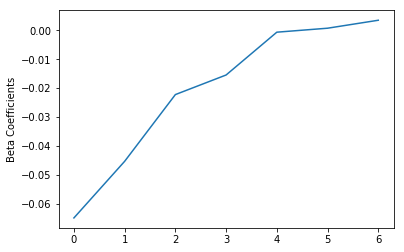

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

# Show the graph. 
plt.show()

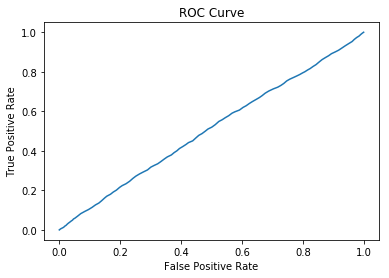

Area Under the Curve: 0.5091715995557872


In [13]:
# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

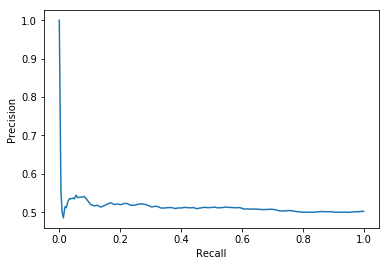

In [14]:
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [54]:
(train_set, val_set, test_set) = diabspark.randomSplit([0.98, 0.01, 0.01], seed = 2000)

In [15]:
from pyspark.ml.clustering import BisectingKMeans

# Loads data.


# Trains a bisecting k-means model.
bkm = BisectingKMeans().setK(2).setSeed(1)
model = bkm.fit(pipe_df)

# Evaluate clustering.
cost = model.computeCost(pipe_df)
print("Within Set Sum of Squared Errors = " + str(cost))

# Shows the result.
print("Cluster Centers: ")
centers = model.clusterCenters()
for center in centers:
    print(center)

Within Set Sum of Squared Errors = 679670.8110242856
Cluster Centers: 
[ 0.9278465   0.50507453 27.03615604  8.01998097  0.34046939  0.3320647
  0.50174437]
[ 0.93012318  0.49787234 50.73012318  7.98656215  0.34266517  0.33236282
  0.5075028 ]


In [13]:
diabspark.show()

+----------+--------+-------+------+----------+-------+---+----------+
|time_in_hr|diabetes|insulin|change|readmitted| gender|age|medication|
+----------+--------+-------+------+----------+-------+---+----------+
|         9|      no|   high|   yes|        no|   Male| 39|        no|
|         6|      no|   high|    no|       yes|   Male| 50|       yes|
|         8|     yes|     up|   yes|        no|   Male| 38|       yes|
|         9|     yes| steady|   yes|        no|   Male| 53|       yes|
|         9|      no|   high|   yes|       yes| Female| 28|        no|
|        10|      no|     up|   yes|       yes| Female| 37|       yes|
|         6|     yes| steady|   yes|        no| Female| 49|        no|
|      null|     yes|   high|   yes|       yes|   Male| 52|       yes|
|         7|      no|   high|   yes|        no| Female| 31|       yes|
|        10|     yes|   high|   yes|       yes|   Male| 42|        no|
|         9|      no|   high|    no|       yes|   Male| 37|       yes|
|     

In [16]:
from pyspark.ml.clustering import GaussianMixture

# loads data


gmm = GaussianMixture().setK(2).setSeed(538009335)
model = gmm.fit(pipe_df)

print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.show(truncate=False)

Gaussians shown as a DataFrame: 
+--------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|mean                                                                                                                                  |cov                                                                                                                                                                                                                                                                                                                             

In [25]:
# Import the relevant packages.
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

# First create a string indexer which converts every string into a number, such as male = 0 and female = 1.
# A number will be assigned to every category in the column.
workclass_indexer = StringIndexer(inputCol='workclass',outputCol='workclassIndex')
maritial_status_indexer = StringIndexer(inputCol='maritial status',outputCol='maritial_statusIndex')
relationship_indexer = StringIndexer(inputCol='relationship',outputCol='relationshipIndex')


salary_indexer = StringIndexer(inputCol='salary',outputCol='label')



# Now we can one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when you have multiple classes.
workclass_encoder = OneHotEncoder(inputCol='workclassIndex',outputCol='workclassVec')
maritial_status_encoder = OneHotEncoder(inputCol='maritial_statusIndex',outputCol='maritial_statusVec')
relationship_encoder = OneHotEncoder(inputCol='relationshipIndex',outputCol='relationshipVec')

#change_encoder = OneHotEncoder(inputCol='changeIndex',outputCol='medicatiVec')

# And finally, using vector assembler to turn all of these columns into one column (named features).
assembler = VectorAssembler(inputCols=['workclassVec','maritial_statusVec','relationshipVec', 'hours per week','age'], outputCol="features")

In [26]:
from pyspark.ml import Pipeline
#diabspark = spark.read.csv('Datasets/diabetes_data.csv',header=True,inferSchema=True)

# Then go through our steps. It's essentially sequential to the above.
pipeline = Pipeline(stages=[workclass_indexer,maritial_status_indexer,relationship_indexer,
                           salary_indexer,workclass_encoder,maritial_status_encoder,relationship_encoder,
                            assembler])

# Now that we've got a number of steps, let's apply it to the DataFrame.
pipeline_model = pipeline.fit(adultspark)

# Incorporate results into a new DataFrame.
pipe_d = pipeline_model.transform(adultspark)

# Remove all variables other than features and label. 
pipe_d = pipe_d.select('features','label')


In [37]:
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_d.randomSplit([0.7,0.3])

In [38]:
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label')

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
results = lr_model.transform(test_data)

Training Dataset Count: 22836
Test Dataset Count: 9725


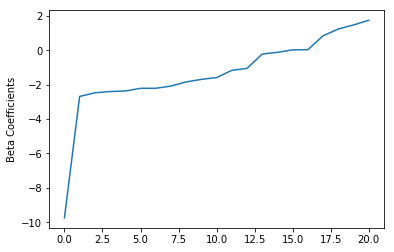

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

# Show the graph. 
plt.show()

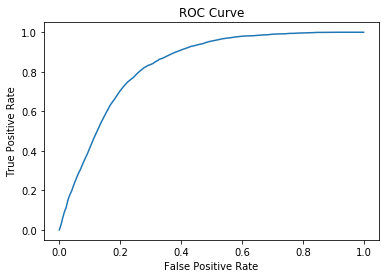

Area Under the Curve: 0.8334439305596087


In [40]:
# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

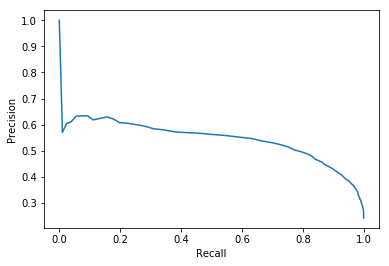

In [41]:
# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [42]:
(train_set, val_set, test_set) = diabspark.randomSplit([0.98, 0.01, 0.01], seed = 2000)

In [43]:
from pyspark.ml.clustering import BisectingKMeans

# Loads data.


# Trains a bisecting k-means model.
bkm = BisectingKMeans().setK(2).setSeed(1)
model = bkm.fit(pipe_d)

# Evaluate clustering.
cost = model.computeCost(pipe_d)
print("Within Set Sum of Squared Errors = " + str(cost))

# Shows the result.
print("Cluster Centers: ")
centers = model.clusterCenters()
for center in centers:
    print(center)

Within Set Sum of Squared Errors = 6904851.972042404
Cluster Centers: 
[7.67918473e-01 4.93215472e-02 5.03913068e-02 5.78233208e-02
 3.72726761e-02 1.59337875e-02 2.06632509e-02 2.81515680e-04
 3.32638928e-01 5.24069591e-01 9.52649063e-02 3.13045437e-02
 4.56055402e-03 1.10917178e-02 2.75491245e-01 2.72056754e-01
 2.65694499e-01 9.84741850e-02 4.81954845e-02 3.84601655e+01
 2.84368560e+01]
[6.11959459e-01 1.12500000e-01 8.09459459e-02 5.46621622e-02
 4.29729730e-02 5.62837838e-02 4.00675676e-02 6.08108108e-04
 6.12702703e-01 9.29054054e-02 1.85878378e-01 3.16891892e-02
 6.16216216e-02 1.49324324e-02 5.60810811e-01 2.34662162e-01
 2.35810811e-02 1.14662162e-01 4.81081081e-02 4.28103378e+01
 5.07560811e+01]


In [36]:
from pyspark.ml.clustering import GaussianMixture

# loads data


gmm = GaussianMixture().setK(2).setSeed(538009335)
model = gmm.fit(pipe_d)

print("Gaussians shown as a DataFrame: ")
model.gaussiansDF.show(truncate=False)

Gaussians shown as a DataFrame: 
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------